# Chap 12 - Ex3: cluster customers into group using shopping_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
shopping = pd.read_csv('Data/shopping_data.csv', index_col = 0)
shopping

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
shopping.columns = shopping.columns.str.replace('\(|\)', '', regex = True).str.replace('-| ', '_', regex = True)
shopping

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_787184/1405141395.py:1: SyntaxWarning: invalid escape sequence '\('
  shopping.columns = shopping.columns.str.replace('\(|\)', '', regex = True).str.replace('-| ', '_', regex = True)


,Genre,Age,Annual_Income_k$,Spending_Score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Genre                 200 non-null    object
 1   Age                   200 non-null    int64 
 2   Annual_Income_k$      200 non-null    int64 
 3   Spending_Score_1_100  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
shopping.isnull().sum()

Genre                   0
Age                     0
Annual_Income_k$        0
Spending_Score_1_100    0
dtype: int64

In [6]:
shopping.describe()

,Age,Annual_Income_k$,Spending_Score_1_100
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## <span style = 'color:yellow'> Check normal distribution and outliers of Age, Annual_Income and Spending_Score

Normality test of Age: ShapiroResult(statistic=0.9516182290435912, pvalue=2.710855723091019e-06)
Normality test of Annual_Income: ShapiroResult(statistic=0.9783897545646609, pvalue=0.0035365109581996213)
Normality test of Spending_Score: ShapiroResult(statistic=0.9694606767011337, pvalue=0.00024229713933301153)



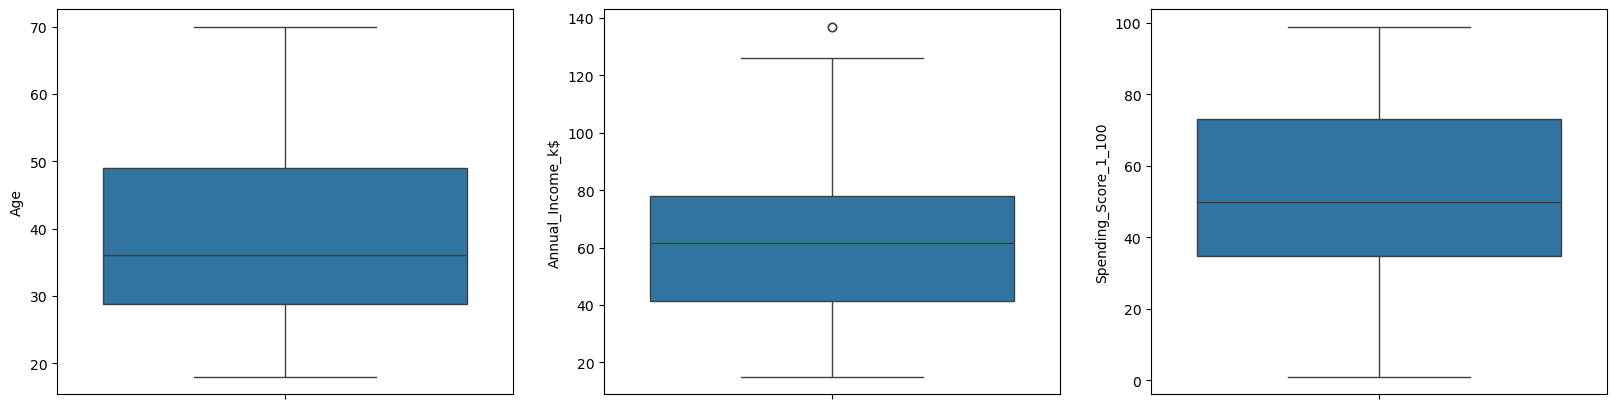


Age, Annual_Income and Spending_Score are not normally distributed, but do not have outliers => can use MinMaxScaler


In [7]:
from scipy.stats import shapiro
print(f'Normality test of Age: {shapiro(shopping['Age'])}')
print(f'Normality test of Annual_Income: {shapiro(shopping['Annual_Income_k$'])}')
print(f'Normality test of Spending_Score: {shapiro(shopping['Spending_Score_1_100'])}')

print()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sbn.boxplot(data = shopping, y = 'Age')
plt.subplot(1,3,2)
sbn.boxplot(data = shopping, y = 'Annual_Income_k$')
plt.subplot(1,3,3)
sbn.boxplot(data = shopping, y = 'Spending_Score_1_100')
plt.show()

print('\nAge, Annual_Income and Spending_Score are not normally distributed, but do not have outliers => can use MinMaxScaler')

## <span style = 'color:yellow'> Find optimal K using Silhoutte Score

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

k_nums = range(2, 16)

data = shopping.copy()

for k in k_nums:
    hierclust_pipe = Pipeline([
        ('OneHotEncoder', make_column_transformer((OneHotEncoder(drop='first', handle_unknown='ignore'), ['Genre']), remainder='passthrough')),
        ('MinMaxScaler', MinMaxScaler()),
        ('HierachichalClustering', AgglomerativeClustering(n_clusters = k))
    ])
    hierclust_pipe.fit(data)
    data_scaled = (
        pd.DataFrame(hierclust_pipe[:-1].transform(data)) #Transform original data with onehotencoder and MinMaxScaler
        .pipe(lambda df: df.set_axis(hierclust_pipe.named_steps['OneHotEncoder'].get_feature_names_out(), axis =1))
    )
    labels = hierclust_pipe.named_steps['HierachichalClustering'].labels_
    print(f'Silhouette score for k = {k}: {silhouette_score(data_scaled, labels)}')

print('\nChoose K = 2 clusters')

Silhouette score for k = 2: 0.5194624832665107
Silhouette score for k = 3: 0.4469979431226989
Silhouette score for k = 4: 0.3444266582171814
Silhouette score for k = 5: 0.35032447507156306
Silhouette score for k = 6: 0.3460050179221861
Silhouette score for k = 7: 0.3643550186201911
Silhouette score for k = 8: 0.3659419625588666
Silhouette score for k = 9: 0.3889434720302352
Silhouette score for k = 10: 0.41403790085368813
Silhouette score for k = 11: 0.4075827308046729
Silhouette score for k = 12: 0.42195481167348364
Silhouette score for k = 13: 0.42309845839416144
Silhouette score for k = 14: 0.43097744185626097
Silhouette score for k = 15: 0.42048297505654647

Choose K = 2 clusters


## <span style = 'color:yellow'> Build official AgglomerativeClustering model with K = 2

In [9]:
#Clustered heatmap plot function
#Dendogram plot function

from scipy.cluster.hierarchy import dendrogram, linkage

def plot_clustered_heatmap(data, model, title="Clustered Heatmap"):
    """
    Plots a clustered heatmap from AgglomerativeClustering outputs.

    Args:
        data: The original data (DataFrame or NumPy array).
        model: Fitted AgglomerativeClustering model.
        title: Title of the plot.
    """

    # Create linkage matrix
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Reorder the data based on clustering
    if isinstance(data, pd.DataFrame):
        ordered_indices = model.labels_
        ordered_data = data.iloc[np.argsort(ordered_indices)]
    else:
        ordered_indices = model.labels_
        ordered_data = data[np.argsort(ordered_indices)]

    # Plot the clustered heatmap
    fig = sbn.clustermap(ordered_data, row_linkage=linkage_matrix, col_cluster=False, figsize=(10, 8), cmap="viridis", cbar_pos=(0.02, 0.8, 0.03, 0.15))
    fig.ax_heatmap.set_title(title)
    plt.show()


def plot_dendrogram(model, **kwargs):
    """
    Plots a dendrogram from an AgglomerativeClustering model.

    Args:
        model: AgglomerativeClustering model.
        **kwargs: Keyword arguments to pass to scipy.cluster.hierarchy.dendrogram.
    """
    # Create linkage matrix from the model's children.
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram.
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

     Genre_Male   Age  Annual_Income_k$  Spending_Score_1_100  Group
0           1.0  19.0              15.0                  39.0      0
1           1.0  21.0              15.0                  81.0      0
2           0.0  20.0              16.0                   6.0      1
3           0.0  23.0              16.0                  77.0      1
4           0.0  31.0              17.0                  40.0      1
..          ...   ...               ...                   ...    ...
195         0.0  35.0             120.0                  79.0      1
196         0.0  45.0             126.0                  28.0      1
197         1.0  32.0             126.0                  74.0      0
198         1.0  32.0             137.0                  18.0      0
199         1.0  30.0             137.0                  83.0      0

[200 rows x 5 columns]


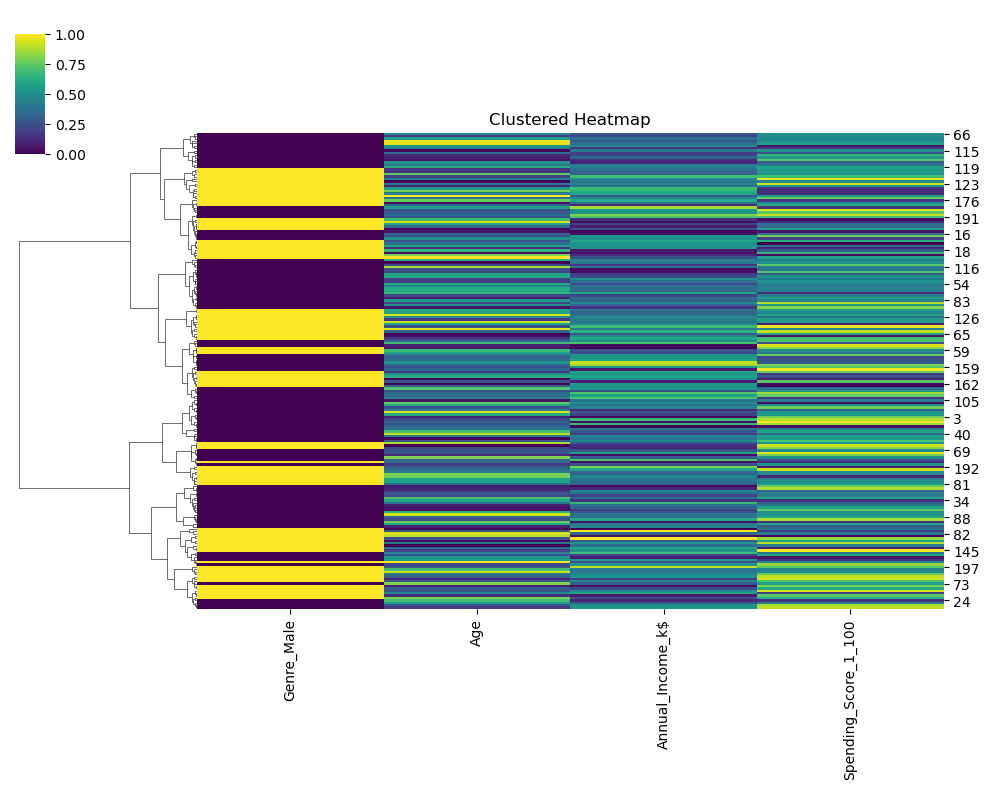

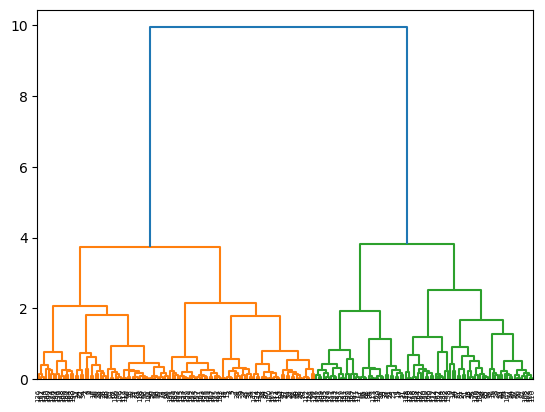

In [10]:
data = shopping.copy()
hierclust_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer((OneHotEncoder(drop='first', handle_unknown='ignore'), ['Genre']), remainder='passthrough')),
    ('MinMaxScaler', MinMaxScaler()),
    ('HierachichalClustering', AgglomerativeClustering(n_clusters = 2, compute_distances= True))
])
hierclust_pipe.fit(data)

labels = hierclust_pipe.named_steps['HierachichalClustering'].labels_

data_group = (
    pd.DataFrame(hierclust_pipe.named_steps['OneHotEncoder'].transform(data)) #Transform original data with onehotencoder
    .pipe(lambda df: df.set_axis(hierclust_pipe.named_steps['OneHotEncoder'].get_feature_names_out(), axis =1))
    .pipe(lambda df: df.set_axis(
        df.columns.str.replace('onehotencoder__', '', regex = True).str.replace('remainder__', '', regex = True), 
        axis =1))
    .assign(Group = labels)
)


print(data_group)

data_scaled_plot = hierclust_pipe.named_steps['MinMaxScaler'].transform(data_group.drop('Group', axis = 1).to_numpy())
data_scaled_plot = pd.DataFrame(data_scaled_plot, columns = data_group.columns[:-1])

plot_clustered_heatmap(data_scaled_plot, hierclust_pipe.named_steps['HierachichalClustering'])
plot_dendrogram(hierclust_pipe.named_steps['HierachichalClustering'])

# <span style = 'color:yellow'> Report clustering results:

In [45]:
for group in data_group['Group'].unique():
    print(f'\n=============== Cluster group {group} =========================\n')
    data = data_group[data_group['Group'] == group]
    print(f'n_observations: {data.shape[0]}\n')
    for col_name in data.columns[:-1]:
        if col_name in ['Genre_Male']:
            print(f'{data[col_name].value_counts().to_frame().reset_index()}')
            print()
        else:
            print(f'{col_name}: {np.min(data[col_name])} ~ {np.median(data[col_name])} ~ {np.max(data[col_name])}')
            print()


=============== Cluster group 0 =========================

n_observations: 88

   Genre_Male  count
0         1.0     88

Age: 18.0 ~ 37.0 ~ 70.0

Annual_Income_k$: 15.0 ~ 62.5 ~ 137.0

Spending_Score_1_100: 1.0 ~ 50.0 ~ 97.0


=============== Cluster group 1 =========================

n_observations: 112

   Genre_Male  count
0         0.0    112

Age: 18.0 ~ 35.0 ~ 68.0

Annual_Income_k$: 16.0 ~ 60.0 ~ 126.0

Spending_Score_1_100: 5.0 ~ 50.0 ~ 99.0



Number of numeric fields: 3

All numeric fields: ['Age', 'Annual_Income_k$', 'Spending_Score_1_100']



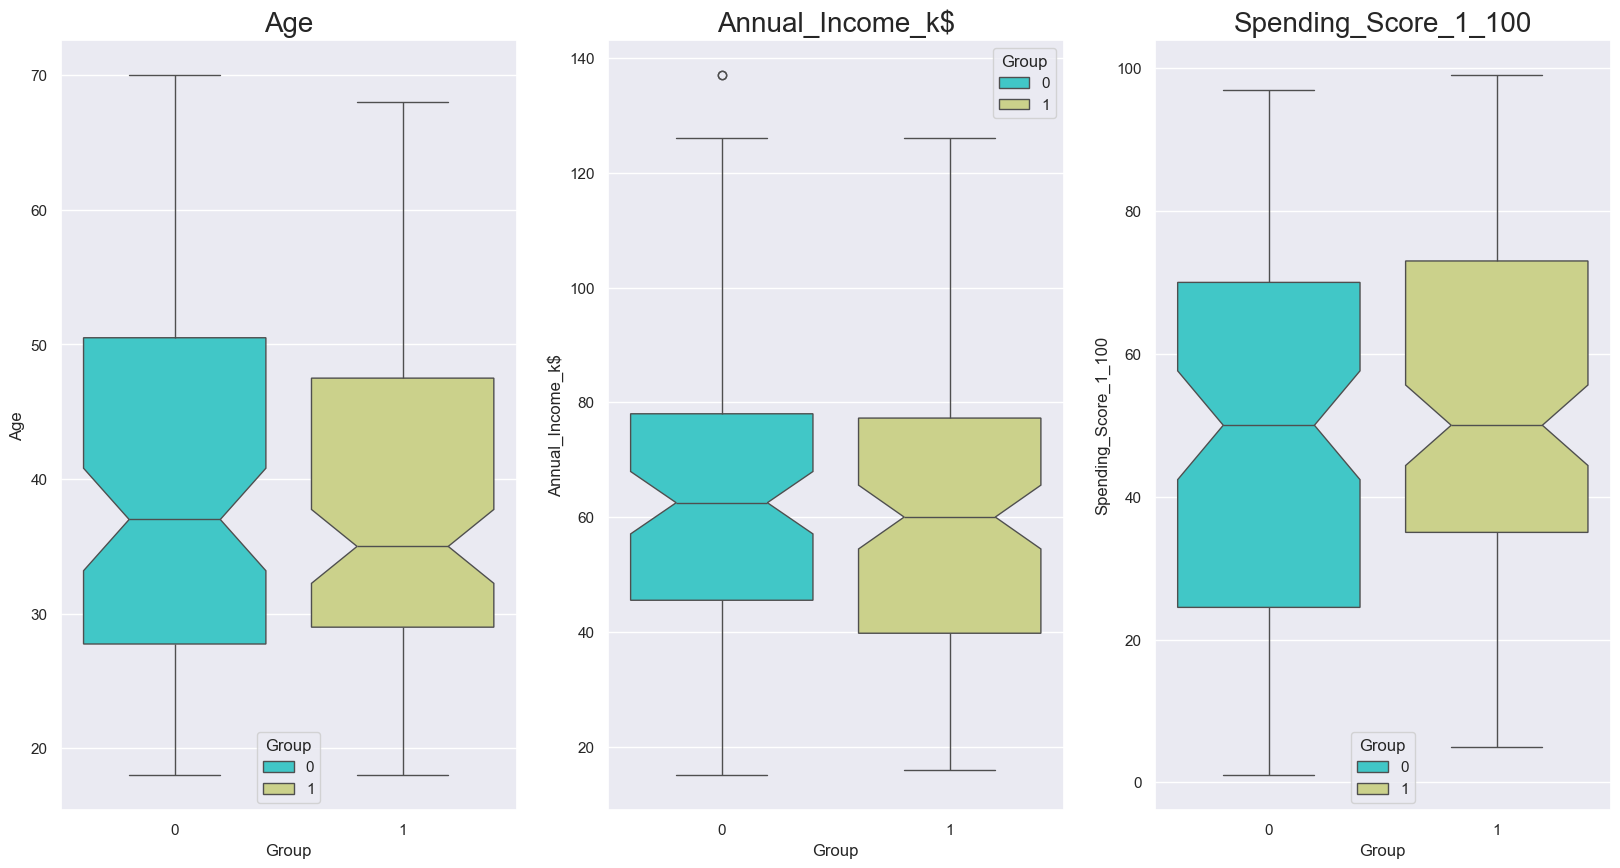


-----------------------------------------------------------------------------------------------------------------------------

Number of categorical fields: 1

All categorical fields: ['Genre_Male']



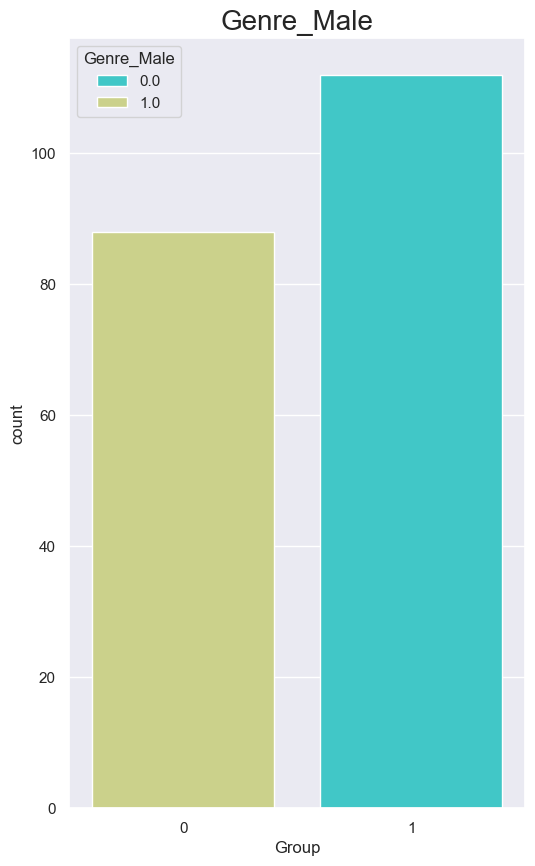

In [47]:
# Method 3: visualizing

numeric_cols = ['Age', 'Annual_Income_k$', 'Spending_Score_1_100']
categ_cols = ['Genre_Male']

##### Function building ##############

def boxplot_numeric(df, numeric_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(numeric_cols) % 3) == 0:
        row = len(numeric_cols) // 3
    else:
        row = (len(numeric_cols) // 3) + 1
    '''
    numeric_cols: list các tên cột biến định lượng
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of numeric fields: {len(numeric_cols)}')
    print()
    print(f'All numeric fields: {numeric_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = df, x = groups, y = numeric_cols[i-1], notch = True, hue = groups, palette = 'rainbow')
        plt.title(numeric_cols[i-1], size = 20)
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
    plt.show()


def countplot_categ(df, categ_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(categ_cols) % 3) == 0:
        row = len(categ_cols) // 3
    else:
        row = (len(categ_cols) // 3) + 1
    '''
    categ_cols: list các tên cột biến định tính
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of categorical fields: {len(categ_cols)}')
    print()
    print(f'All categorical fields: {categ_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(categ_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.countplot(data = df, x = groups, hue = categ_cols[i-1], palette = 'rainbow')
        plt.title(categ_cols[i-1], size = 20)
      except:
        print('Error {}'.format(categ_cols[i-1]))
        break
    plt.show()

## Draw
sbn.set_theme(style ='darkgrid')
boxplot_numeric(data_group, numeric_cols, groups = data_group.iloc[:,-1])
print('\n-----------------------------------------------------------------------------------------------------------------------------\n')
countplot_categ(data_group, categ_cols, groups = data_group.iloc[:,-1])